# Import and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod data
df = pd.read_csv('../data/derived/combined_data_by_year.csv', index_col=0)

In [4]:
# select columns for visualization
df = df[['year', 'country_id', 'country_txt_wb', 'country_txt_gtd', 'tourism_group', 'incident_ct_total', 'population']]

In [5]:
# add incidents per capita column
df['incidents_per_capita'] = df['incident_ct_total'] / df['population']

In [6]:
# examine dataframe
df.head()

,year,country_id,country_txt_wb,country_txt_gtd,tourism_group,incident_ct_total,population,incidents_per_capita
0,2012,5,Albania,NaN,NaN,0,2900401,0.000000e+00
1,2012,6,Algeria,Algeria,NaN,27,37383887,7.222363e-07
2,2012,7,Andorra,NaN,NaN,0,82427,0.000000e+00
3,2012,8,Angola,NaN,NaN,0,25107931,0.000000e+00
4,2012,10,Antigua and Barbuda,NaN,NaN,0,90409,0.000000e+00


# Exploratory plotting

Before I create the plot we mocked up, I want to get an idea for the distribution of incidents, populations, and incidents per capita for all countries and all years.

In [7]:
# define columns of interest
columns_of_interest = ['incident_ct_total', 'population', 'incidents_per_capita']

In [8]:
# describe columns of interest
df[columns_of_interest].describe()

,incident_ct_total,population,incidents_per_capita
count,1078.000000,1.078000e+03,1.078000e+03
mean,15.210575,4.056657e+07,6.011824e-07
std,59.751118,1.555498e+08,2.662523e-06
min,0.000000,1.073900e+04,0.000000e+00
25%,0.000000,2.029969e+06,0.000000e+00
50%,0.000000,7.364150e+06,0.000000e+00
75%,4.000000,2.620072e+07,2.339494e-07
max,671.000000,1.392730e+09,5.632613e-05


All variables have 1078 values.

The number of incidents range from 0 to 671. Most values are 0. The median is 0, the mean is 15, and the standard deviation of 59.75. The distribution has many low numbers with a few extremely high numbers - it is right skewed.

The populatioin ranges from 10,739 to 1,392,730,000. The median is 7,364,150, the mean is 40,566,569, and the standard deviation is 155,549,802. The distribution also has a right skew, but not as much as the number of incidents.

The incidents per capita range from 0 to 0.00005. Most values are 0. This distribution is right skewed. The non-zero numbers are very small, making them difficult to interpret and discuss. We may want to adjust the scale of our plot. Perhaps we could adjust population to be in the thousands, so that this number would have the unit of "incidents per 1000 people" rather than "incidents per capita".

In [9]:
def plot_histogram(column_name):
    plt.hist(df[column_name], bins=30, label=column_name)
    plt.xlabel(column_name)
    plt.ylabel('frequency')
    plt.show()

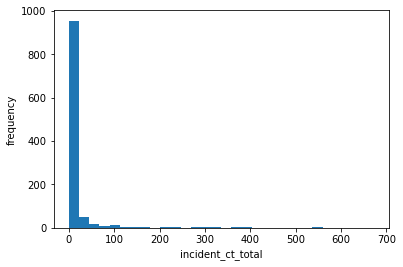

In [10]:
plot_histogram('incident_ct_total')

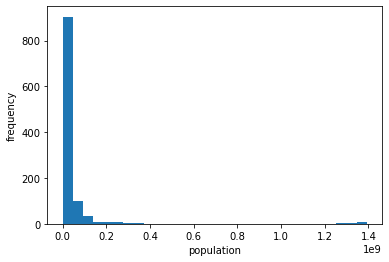

In [11]:
plot_histogram('population')

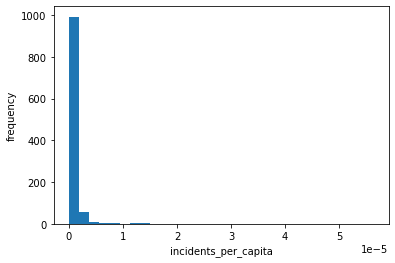

In [12]:
plot_histogram('incidents_per_capita')

I see the right skew I expected in each of these variables. So many zero values!

# Some plots to try

* violin plot
* swarm plot
* strip plot

# Some transformations to try

* drop zeroes?
* log-transform (would require special treatment for zeros... log(0) = undefined)

# Violin plot with matplotlib

I created this plot to match our mockup, but I think it's terrible. I want to see the data points themselves, not just the smoothed out distribution.

In [13]:
# find slices for all countries, and countries with high and low tourism
all_x = df['incidents_per_capita']
high_x = df[df['tourism_group']=='high']['incidents_per_capita']
low_x = df[df['tourism_group']=='low']['incidents_per_capita']

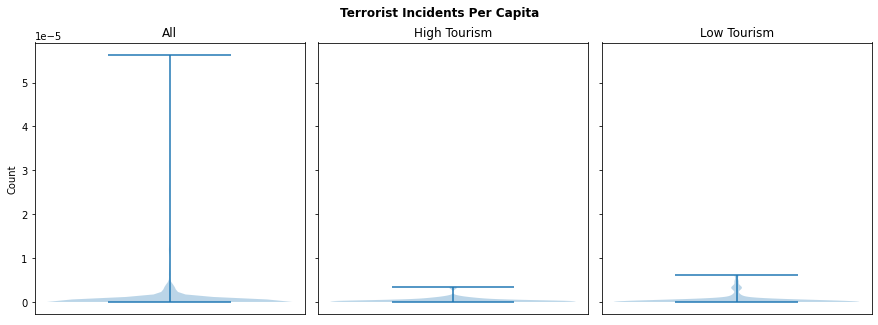

In [14]:
# initialize figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
fig.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Terrorist Incidents Per Capita', fontsize=12, fontweight ="bold")

# create violin plots
ax1.violinplot(all_x)
ax2.violinplot(high_x)
ax3.violinplot(low_x)

# add subplot titles
ax1.set_title('All')
ax2.set_title('High Tourism')
ax3.set_title('Low Tourism')

# remove x-axis
for ax in [ax1, ax2, ax3]: ax.xaxis.set_visible(False)

# add y-axis label
ax1.set_ylabel('Count')

# show plot
plt.show()

# Experiment in seaborn

I am going to switch to seaborn for some exploration. I want to try a violion plot with the data points, which is the default for a seaborn violion plot. I'd also like to try swarm and strip plots, which are included in seaborn, but not in matplotlib. Since seaborn is built on top of matplotlib, I can retoractively style the plots to match pyplot formatting, for a consistent style throughout our report. But for now, I'll focus on exploring different plot types.

### Violin plot

<AxesSubplot:ylabel='incidents_per_capita'>

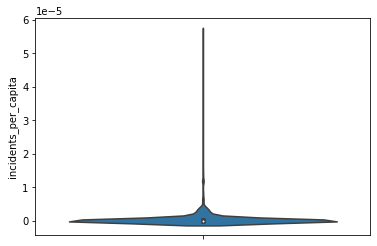

In [16]:
# create violin plot for all countries
sns.violinplot(y='incidents_per_capita', data=df)

<AxesSubplot:xlabel='tourism_group', ylabel='incidents_per_capita'>

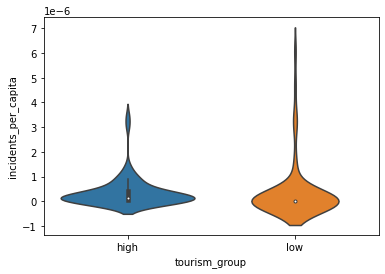

In [17]:
# create violin plot for high and low tourism countries
sns.violinplot(x='tourism_group', y='incidents_per_capita', data=df)

The addition of data points doesn't add a whole lot here. The entire distribution is still basically zero.

<AxesSubplot:xlabel='year', ylabel='incidents_per_capita'>

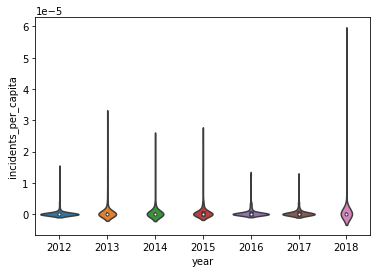

In [18]:
# create violin plot for all countries, split by year
sns.violinplot(x='year', y='incidents_per_capita', data=df)

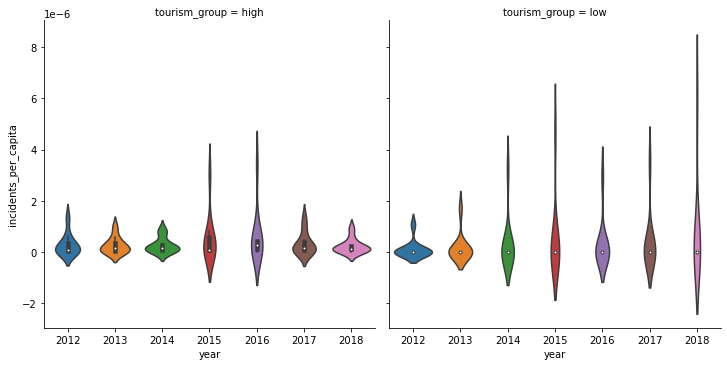

In [19]:
# create violin plot for high and low tourism countries, split by year
sns.catplot(x='year', y='incidents_per_capita', col='tourism_group', data=df, kind='violin')

I thought it would be interesting to try year by year, and it is a little cool! But still, the issue of zeroes remains.

### Plot swarm plot

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='incidents_per_capita'>

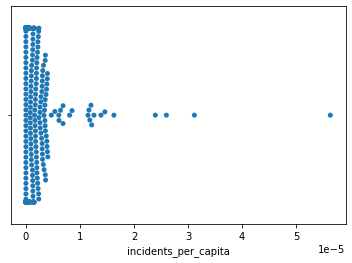

In [15]:
%time
sns.swarmplot(x=all_x)

Throws an error, can't handle all the zeros. I relate. Moving onto strip plot.

### Stripplots

<AxesSubplot:xlabel='year', ylabel='incidents_per_capita'>

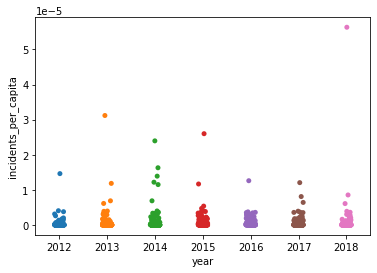

In [20]:
sns.stripplot(x='year', y='incidents_per_capita', data=df)

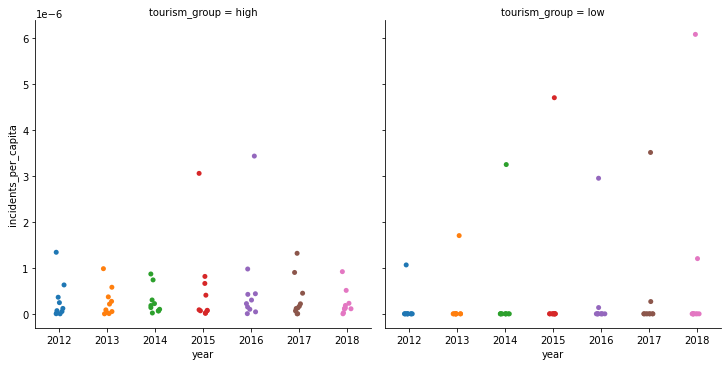

In [21]:
sns.catplot(x='year', y='incidents_per_capita', col='tourism_group', data=df, kind='strip')

So far, I'm liking the stripplots best. I like that you can see that clump of zero values. I like looking at year-by-year, although I don't know that it's necessary. I'd like to create a stripplot for each tourism grouping. Without trying some sort of log scaling, I think this is the best bet.